# Import the library needed


In [1]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Load Datasets

In [2]:
all_df=pd.read_excel("trainDataset.xls",index_col=False)
all_df = all_df.drop(['ID','pCR (outcome)'],axis=1)

# Data Cleaning and Pre-processing

In [3]:
# Determine the missing value (999) in the datasets

all_df[all_df.eq(999).any(axis=1)]

,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
218,50.000000,47.255305,1,1,0,0,999,999,999,1,...,0.555687,0.555687,2.209691,0.000821,2.507519e+07,8.909011,0.028160,0.003241,0.000008,0.025185
253,45.000000,46.639288,1,1,0,0,999,999,999,1,...,0.318539,0.318539,3.027169,0.004115,5.418705e+05,14.395120,0.018432,0.040593,0.001791,0.015474
258,42.000000,56.919918,0,0,0,1,999,3,999,1,...,0.346553,0.346553,3.698274,0.004569,4.016071e+06,168.506539,0.001617,0.059487,0.003546,0.001411
285,38.000000,66.800000,1,999,999,999,3,3,1,0,...,0.627560,0.627560,1.994841,0.001028,1.434113e+07,150.821958,0.001886,0.057344,0.004716,0.001705
387,55.083333,28.300000,0,0,0,1,3,1,1,999,...,0.300230,0.300229,2.750000,0.003303,5.709332e+05,13.723543,0.019693,0.041933,0.002050,0.019120


In [4]:
# Drop the row that contain missing value (999)
cleaned_data = all_df[~all_df.eq(999).any(axis=1)]
X = cleaned_data.drop('RelapseFreeSurvival (outcome)',axis=1)
y = cleaned_data['RelapseFreeSurvival (outcome)']
print(X.shape)
print(y.shape)

(395, 117)
(395,)


In [5]:
cleaned_data.isnull().sum().sum()

0

# Normalize data before feature selection and model training

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)
Xs

array([[-1.00599777, -1.08181776, -0.82080985, ...,  2.64536293,
         2.90207816, -0.24760797],
       [-1.1908398 ,  0.92437011,  1.21830896, ..., -0.52436545,
        -0.59031918, -0.22247632],
       [-1.93020791, -1.08181776, -0.82080985, ..., -0.69170221,
        -0.64669977, -0.19876117],
       ...,
       [ 1.56330644,  0.92437011, -0.82080985, ..., -0.06027399,
        -0.27176946, -0.24236922],
       [-0.54389269,  0.92437011, -0.82080985, ..., -0.80493971,
        -0.67255268, -0.05942538],
       [ 0.31562274, -1.08181776, -0.82080985, ..., -0.03737233,
        -0.3478796 , -0.22471255]])

# Feature Selection

In [7]:
from sklearn.ensemble import RandomForestRegressor

cv = KFold(n_splits=5, random_state=1, shuffle=True)

# cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestRegressor(random_state=1)
fs = SelectKBest(score_func=f_regression)
pipeline = Pipeline(steps=[('sel',fs), ('rgs', model)])
params = [{'sel__k':[i for i in range(1, X.shape[1]+1)]}]

# define the grid search
search = GridSearchCV(pipeline, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(Xs, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -20.326
Best Config: {'sel__k': 24}
>-24.383 with: {'sel__k': 1}
>-23.335 with: {'sel__k': 2}
>-22.350 with: {'sel__k': 3}
>-21.742 with: {'sel__k': 4}
>-21.852 with: {'sel__k': 5}
>-21.615 with: {'sel__k': 6}
>-21.693 with: {'sel__k': 7}
>-21.202 with: {'sel__k': 8}
>-21.408 with: {'sel__k': 9}
>-20.997 with: {'sel__k': 10}
>-20.717 with: {'sel__k': 11}
>-20.840 with: {'sel__k': 12}
>-20.939 with: {'sel__k': 13}
>-20.905 with: {'sel__k': 14}
>-20.894 with: {'sel__k': 15}
>-21.009 with: {'sel__k': 16}
>-20.736 with: {'sel__k': 17}
>-20.805 with: {'sel__k': 18}
>-20.988 with: {'sel__k': 19}
>-20.846 with: {'sel__k': 20}
>-20.849 with: {'sel__k': 21}
>-20.540 with: {'sel__k': 22}
>-20.416 with: {'sel__k': 23}
>-20.326 with: {'sel__k': 24}
>-20.369 with: {'sel__k': 25}
>-20.456 with: {'sel__k': 26}
>-20.535 with: {'sel__k': 27}
>-20.499 with: {'sel__k': 28}
>-20.427 with: {'sel__k': 29}
>-20.615 with: {'sel__k': 30}
>-20.767 with: {'sel__k': 31}
>-20.565 with: {'sel__k': 32}
>-2

In [8]:
# Obtain the number of best feature that will be chosen
import re
num_col = int(re.search(r'\d+', str(results.best_params_)).group())
num_col

24

# Select the best features obtain from the result above and extract from the input datasets (X) 

In [9]:
selector = SelectKBest(score_func=f_regression, k=num_col)
new_x = selector.fit_transform(Xs, y)


In [10]:
# Show the features selected after feature selection

cols = selector.get_support(indices=True)
new_all_df = X.iloc[:,cols]
print(new_all_df.shape)
new_all_df.describe()

(395, 24)


,ChemoGrade,TumourStage,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Variance,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_ZonePercentage
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02,395.000000
mean,2.402532,2.584810,23.098152,46.974072,47.700576,44.740659,47.463166,55.758998,20140.356540,31.321857,...,2.806193,3.982808,0.690337,5.029484,0.505769,1.732676,0.769428,0.003992,5.543508e+07,0.003321
std,0.501261,0.889745,9.942466,29.815861,23.879496,25.860421,27.302820,31.164537,34147.704003,14.948567,...,0.790059,1.377606,0.212727,1.440978,0.170694,0.480601,0.494837,0.002107,7.398741e+08,0.002420
min,1.000000,1.000000,5.488466,12.466885,12.165525,13.038405,12.369317,15.524175,522.541667,9.197979,...,1.703169,1.789861,0.278008,2.609159,0.174026,0.450734,0.137128,0.000496,1.446278e+04,0.000008
25%,2.000000,2.000000,16.527720,28.190264,31.144823,28.965312,30.083218,34.633780,5632.979166,20.954383,...,2.327211,3.067744,0.534178,4.010377,0.379549,1.412838,0.442676,0.002392,3.685894e+05,0.001345
50%,2.000000,2.000000,21.554273,38.984484,40.607881,38.327536,39.446166,46.882833,11919.875000,27.583651,...,2.644304,3.711769,0.666808,4.723785,0.489413,1.636014,0.658301,0.003983,9.885922e+05,0.002885
75%,3.000000,3.000000,27.744913,58.169823,59.117826,54.447206,57.831476,68.562443,23353.979165,37.904821,...,3.029886,4.485584,0.819864,5.534179,0.616396,1.966638,0.983977,0.005243,2.702783e+06,0.004766
max,3.000000,4.000000,92.516207,326.866827,155.756220,241.530536,237.033753,242.614921,528765.458300,126.141700,...,9.176538,11.180875,1.664640,12.240681,1.253614,3.786760,3.959871,0.014780,1.419410e+10,0.011301


# Normalize the new input(X) after feature selection before model training

In [11]:
new_Xs = scaler.fit_transform(new_all_df)
new_Xs

array([[ 1.19344226, -0.65811165,  0.06886136, ...,  0.0197483 ,
        -0.07343578, -0.41659739],
       [ 1.19344226, -0.65811165, -0.23995184, ...,  0.50949351,
        -0.07420671,  0.9480735 ],
       [-0.80405644, -0.65811165, -0.14484878, ...,  0.798531  ,
        -0.07449158,  1.41941677],
       ...,
       [ 1.19344226,  0.46723078,  0.84628224, ..., -1.2532167 ,
        -0.06786834, -0.91354143],
       [-0.80405644, -0.65811165, -0.85373197, ...,  0.94846812,
        -0.07482274,  1.40062824],
       [-0.80405644, -0.65811165, -0.42538421, ...,  0.76034301,
        -0.07447616,  0.85615873]])

# Hyperparameter Tuning with GridSearchCV for Random Forest

In [12]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                           cv = cv, n_jobs = -1)
grid_search.fit(new_Xs, y)
# Show the best parameter setting
print('Best parameters found:\n', grid_search.best_params_)

Best parameters found:
 {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


# Split the data for testing the model with hyperparameter optimization

In [13]:
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(new_Xs, y, test_size=0.2, random_state=1)

# Fit the best parameter settings into the model and train to predict the test data

In [14]:
model =  RandomForestRegressor(random_state=1).set_params(**grid_search.best_params_)
rgs = model.fit(Xs_train, y_train)
y_pred = rgs.predict(Xs_test)

# Evaluate the result

In [15]:
# Compare the difference between the predicted value and actual value
pred_data = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})

print(pred_data)

        Actual  Predicted  Difference
146  67.000000  44.811339   22.188661
383  56.083333  69.663480  -13.580147
248  43.000000  58.423668  -15.423668
197  57.000000  63.502525   -6.502525
372  58.416667  55.390207    3.026459
..         ...        ...         ...
41   98.000000  60.539395   37.460605
204  55.000000  57.088677   -2.088677
366  62.083333  60.326504    1.756829
234  47.000000  33.065151   13.934849
278  39.000000  53.926354  -14.926354

[79 rows x 3 columns]


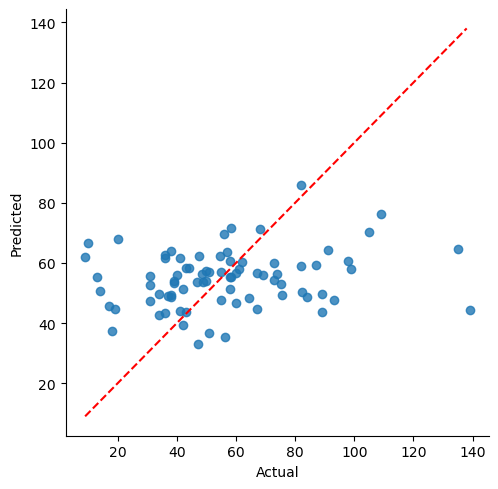

In [16]:
data_results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
sns.lmplot(x='Actual',y='Predicted',data=data_results,fit_reg=False)
d_line= np.arange(data_results.min().min(), data_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

# Determine the accuracy by mean absolute error, mean squared error, root mean squared error and r2 score 

# Original datasets after feature slection and normalization

In [17]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)


r2_scores = cross_val_score(model, new_Xs, y, scoring='r2', cv=cv, n_jobs=-1)
print("K-Fold R2 score =", round(np.mean(r2_scores),2))

mae = cross_val_score(model, new_Xs, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("K-Fold mean absolute error score =", round(np.mean(np.absolute(mae)),2))

#K-Fold Mean Squared Error
MSE = cross_val_score(model, new_Xs, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Squared Error =", round(np.mean(np.absolute(MSE)),2))

#K-Fold Root Mean Squared Error
RMSE = cross_val_score(model, new_Xs, y, scoring='neg_root_mean_squared_error',
                         cv=cv,n_jobs=-1)
print("K-Fold Root Mean Squared error =", round(np.mean(np.absolute(RMSE)),2))

K-Fold R2 score = 0.1
K-Fold mean absolute error score = 20.09
K-Fold Mean Squared Error = 648.79
K-Fold Root Mean Squared error = 25.45


# Xs-train & y-train

In [18]:
r2_scores = cross_val_score(model, Xs_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
print("K-Fold R2 score =", round(np.mean(r2_scores),2))

mae = cross_val_score(model, Xs_train, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("K-Fold mean absolute error score =", round(np.mean(np.absolute(mae)),2))

#K-Fold Mean Squared Error
MSE = cross_val_score(model, Xs_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Squared Error =", round(np.mean(np.absolute(MSE)),2))

#K-Fold Root Mean Squared Error
RMSE = cross_val_score(model, Xs_train, y_train, scoring='neg_root_mean_squared_error',
                         cv=cv,n_jobs=-1)
print("K-Fold Root Mean Squared error =", round(np.mean(np.absolute(RMSE)),2))

K-Fold R2 score = 0.06
K-Fold mean absolute error score = 20.77
K-Fold Mean Squared Error = 669.51
K-Fold Root Mean Squared error = 25.85


# Xs-test & y-test

In [19]:
r2_scores = cross_val_score(model, Xs_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
print("K-Fold R2 score =", round(np.mean(r2_scores),2))

mae = cross_val_score(model, Xs_test, y_test, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("K-Fold mean absolute error score =", round(np.mean(np.absolute(mae)),2))

#K-Fold Mean Squared Error
MSE = cross_val_score(model, Xs_test, y_test, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Squared Error =", round(np.mean(np.absolute(MSE)),2))

#K-Fold Root Mean Squared Error
RMSE = cross_val_score(model, Xs_test, y_test, scoring='neg_root_mean_squared_error',
                         cv=cv,n_jobs=-1)
print("K-Fold Root Mean Squared error =", round(np.mean(np.absolute(RMSE)),2))

K-Fold R2 score = -0.18
K-Fold mean absolute error score = 21.67
K-Fold Mean Squared Error = 782.33
K-Fold Root Mean Squared error = 27.2
